# 데이터, 라이브러리

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# train.csv 파일 읽어오기
train = pd.read_csv('/content/drive/MyDrive/data/bicycle_trainingset.csv')
print(train.shape)
train.head()

(10886, 73)


,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,discomfort_index,peak,temp(difference),ideal,sticky,rainyday,temp_scaled,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,hw_0,hw_1,hw_2,hw_3,hw_4,hw_5,hw_6,hw_7,hw_8,hw_9,hw_10,hw_11,hw_12,hw_13,hw_14,hw_15,hw_16,hw_17,hw_18,hw_19,hw_20,hw_21,hw_22,hw_23
0,0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,17.191688,3,13,16,0,1,1,0,Saturday,50.58,0,-4.56,0,0,0,0.224490,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,17.191688,8,32,40,0,1,1,1,Saturday,49.31,0,-4.62,0,0,0,0.204082,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,17.191688,5,27,32,0,1,1,2,Saturday,49.31,0,-4.62,0,0,0,0.204082,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,17.191688,3,10,13,0,1,1,3,Saturday,50.85,0,-4.56,0,0,0,0.224490,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,17.191688,0,1,1,0,1,1,4,Saturday,50.85,0,-4.56,0,0,0,0.224490,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train_name = ['year','rainyday', 'temp_scaled', 'h_0',
                'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10',
                'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19',
                'h_20', 'h_21', 'h_22', 'h_23','hw_0', 'hw_1', 'hw_2', 'hw_3', 'hw_4', 'hw_5',
                'hw_6', 'hw_7', 'hw_8', 'hw_9', 'hw_10', 'hw_11', 'hw_12', 'hw_13',
                'hw_14', 'hw_15', 'hw_16', 'hw_17', 'hw_18', 'hw_19', 'hw_20', 'hw_21',
                'hw_22', 'hw_23']

Y_train_name = 'count'

train_name = ['year','rainyday', 'temp_scaled', 'h_0',
              'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10',
              'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19',
              'h_20', 'h_21', 'h_22', 'h_23','hw_0', 'hw_1', 'hw_2', 'hw_3', 'hw_4', 'hw_5',
              'hw_6', 'hw_7', 'hw_8', 'hw_9', 'hw_10', 'hw_11', 'hw_12', 'hw_13',
              'hw_14', 'hw_15', 'hw_16', 'hw_17', 'hw_18', 'hw_19', 'hw_20', 'hw_21',
              'hw_22', 'hw_23', 'count']

In [5]:
# X_train = train.loc[:, X_train_name]
# Y_train = train.loc[:, Y_train_name]

train = train.loc[:, train_name] # 사용할 변수들만 추출

# Support Vector Regression 모델링

## 셋 나누기

In [7]:
from sklearn.model_selection import train_test_split

# 셋 나누기, train : validation = 약 3:1 = 0.75 : 0.25

X = train.loc[:,X_train_name]

target = train[Y_train_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size = 0.25, random_state = 123)

## 모델링

In [14]:
from sklearn import svm
regr = svm.SVR() # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr.fit(X_train, y_train)

SVR()

In [18]:
predicted_counts = regr.predict(X_valid)
actual_counts = y_valid

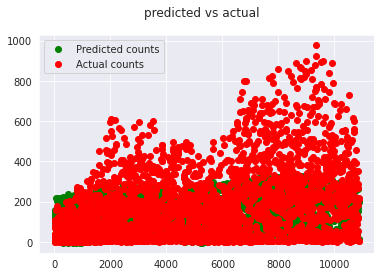

In [19]:
fig = plt.figure()
fig.suptitle('predicted vs actual')
predicted, = plt.plot(X_valid.index, predicted_counts, 'go', label='Predicted counts')
actual, = plt.plot(X_valid.index, actual_counts, 'ro', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [20]:
# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

ValueError: ignored

- 예측값 중 Minus (-) 값이 있어서 모델링 자체에 오류가 있다는 것을 파악
- 타깃변수를 log 변환을 해야할지? (포아송모델에서 출발하는걸로)
- 커널 설정시 포아송분포를 도입할만한 커널로 접근해야되는건지
- 파라미터를 다시 설정해야하는건지 문제점에 대한 다양한 관점이 생각이 났습니다.

<a href="https://suppppppp.github.io/posts/Why-Series-MDM-1/">log, log1p를 언제 취해야하는지에 대한 답변</a>

In [21]:
from sklearn import svm
regr = svm.SVR() # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr.fit(X_train, np.log(y_train))

SVR()

In [22]:
predicted_counts = np.exp(regr.predict(X_valid)) # log 처리된것을 다시 exp 처리해야 기존 값과 비교가 가능
actual_counts = y_valid

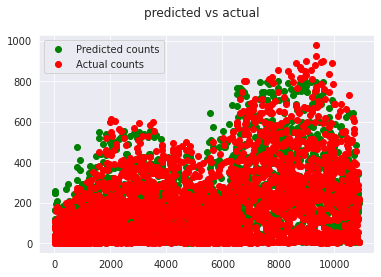

In [23]:
fig = plt.figure()
fig.suptitle('predicted vs actual')
predicted, = plt.plot(X_valid.index, predicted_counts, 'go', label='Predicted counts')
actual, = plt.plot(X_valid.index, actual_counts, 'ro', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [24]:
# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.3938390551808864

## 이론에 맞는 모델링에 대해

- Y인 log('count') ~ X 에 식에 대해 선형성을 만족한다는 가정을 만족시키므로 -> LinearSVR() 을 활용
- 하이퍼파라미터인 ε(epsilon)은 어떻게 설정할 것인지?


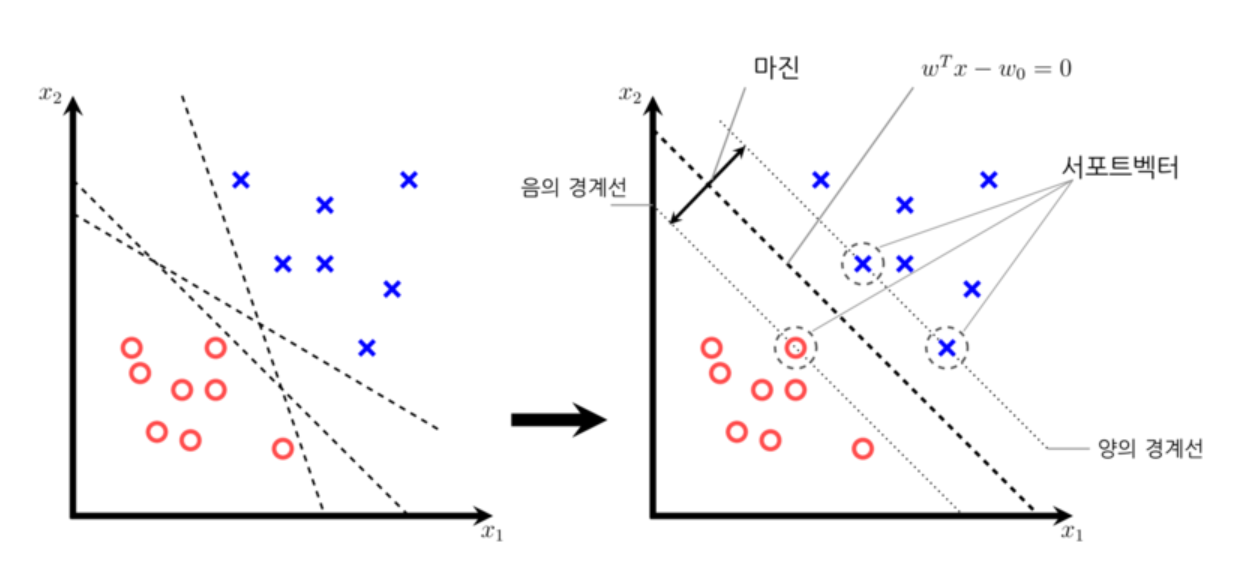

In [26]:
from sklearn.svm import LinearSVR

regr_1 = svm.LinearSVR() # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr_1.fit(X_train, np.log(y_train))

predicted_counts = np.exp(regr_1.predict(X_valid))
actual_counts = y_valid

# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.4214510970923486

- 오히려 지표가 올라감

In [27]:
# 마진이 1.5 일때 (epsilon)

regr_2 = svm.LinearSVR(epsilon = 1.5) # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr_2.fit(X_train, np.log(y_train))

predicted_counts = np.exp(regr_2.predict(X_valid))
actual_counts = y_valid

# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.7451267460951905

In [28]:
# 마진이 0.5 일때 (epsilon)

regr_2 = svm.LinearSVR(epsilon = 0.5) # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr_2.fit(X_train, np.log(y_train))

predicted_counts = np.exp(regr_2.predict(X_valid))
actual_counts = y_valid

# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.4179057819875361

In [29]:
# 마진이 0.1 일때 (epsilon)

regr_2 = svm.LinearSVR(epsilon = 0.1) # 파라미터 하나도 기입하지않고 그냥 SVR 돌렸을때
regr_2.fit(X_train, np.log(y_train))

predicted_counts = np.exp(regr_2.predict(X_valid))
actual_counts = y_valid

# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.41934058152964604

- epsilon 값이 작아질수록 error가 줄어든다.
- SVM 모델은 마진을 최대화하는 방향으로 최적화를 진행하는데 마진이 작아질수록 과대적합되기 쉬움.
- 기존 SVR 모델링 커널은 __가우시안 커널__ -> 이게 맞는건지?

In [31]:
# Non Linear SVR 로 접근해보기
poly_regr = svm.SVR(kernel = 'poly', degree = 2 , epsilon = 0.5) # 왜 2차로? -> 두 변수의 곱 h * w 이 있어서 그렇게 넣어봤음.
poly_regr.fit(X_train, np.log(y_train))

predicted_counts = np.exp(poly_regr.predict(X_valid))
actual_counts = y_valid

# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

0.42685772659193366

### 하다가 궁금한점
- SVR(kernel = linear) 랑 LinearSVR의 차이?
- 마진인 Epsilon 값을 최대화하는 그 순간의 값을 구하기 위해서 어떤 방법으로 접근?
- 하드마진과 소프트마진의 차이?

- 여러 변수 만들려고 할때 변수 루프를 어떻게 돌리나요?